In [ ]:
import pandas as pd
import numpy as np 

# Import data
df = pd.read_csv('data\house-votes-84.csv')
column_names = df.columns.values[1:]
for c in column_names:
    df.loc[df.loc[:, c] == 'n', c] = 0
    df.loc[df.loc[:, c] == 'y', c] = 1
    df.loc[df.loc[:, c] == '?', c] = 0

df.head()

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

In [ ]:
X_new = pd.DataFrame([0.696469,0.286139,0.226851,0.551315,0.719469,0.423106,0.980764,
0.68483,0.480932,0.392118,0.343178,0.72905,0.438572,0.059678,0.398044,0.737995])
X_new = pd.DataFrame(X_new.transpose())

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [4]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.9833333333333333


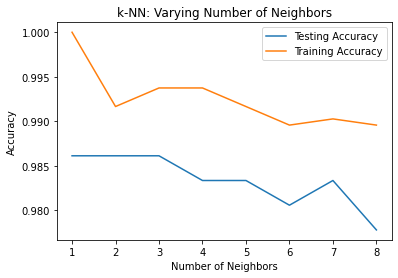

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


In [14]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('data/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


0.6192442167740035


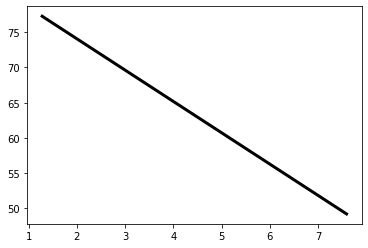

In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Creating Variables
X = X_reshaped
y = y_reshaped

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [19]:
X_fertility

array([2.73, 6.43, 2.24, 1.4 , 1.96, 1.41, 1.99, 1.89, 2.38, 1.83, 1.42,
       1.82, 2.91, 5.27, 2.51, 3.48, 2.86, 1.9 , 1.43, 6.04, 6.48, 3.05,
       5.17, 1.68, 6.81, 1.89, 2.43, 5.05, 5.1 , 1.91, 4.91, 1.43, 1.5 ,
       1.89, 3.76, 2.73, 2.95, 2.32, 5.31, 5.16, 1.62, 2.74, 1.85, 1.97,
       4.28, 5.8 , 1.79, 1.37, 4.19, 1.46, 4.12, 5.34, 5.25, 2.74, 3.5 ,
       3.27, 1.33, 2.12, 2.64, 2.48, 1.88, 2.  , 2.92, 1.39, 2.39, 1.34,
       2.51, 4.76, 1.5 , 1.57, 3.34, 5.19, 1.42, 1.63, 4.79, 5.78, 2.05,
       2.38, 6.82, 1.38, 4.94, 1.58, 2.35, 1.49, 2.37, 2.44, 5.54, 2.05,
       2.9 , 1.77, 2.12, 2.72, 7.59, 6.02, 1.96, 2.89, 3.58, 2.61, 4.07,
       3.06, 2.58, 3.26, 1.33, 1.36, 2.2 , 1.34, 1.49, 5.06, 5.11, 1.41,
       5.13, 1.28, 1.31, 1.43, 7.06, 2.54, 1.42, 2.32, 4.79, 2.41, 3.7 ,
       1.92, 1.47, 3.7 , 5.54, 1.48, 4.88, 1.8 , 2.04, 2.15, 6.34, 1.38,
       1.87, 2.07, 2.11, 2.46, 1.86, 5.88, 3.85])